# Задания

In [19]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Задание 1

Загрузи информацию о [заявках на кредит](datasets/credit_scoring.csv). 
Перечисли имена клиентов, которым должны одобрить заявку на кредит, исходя из изображенного дерева решений.

<center><img src="../misc/images/simple-tree.png" width="440" height="440"/> <center/>

In [21]:
df=pd.read_csv('..\datasets\credit_scoring.csv')
df=df[(df['Возраст']>18)&(df['Месячный доход']>10000)]
print('Клиенты, которым должны одобрить заявку на кредит:',*list(df['Имя']))

Клиенты, которым должны одобрить заявку на кредит: Ольга Петр


## Задание 2

Давай решим задачу классификации.
Загрузи классический датасет [классификации ирисов](https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-plants-dataset).
В нем содержатся измерения параметров чашелистиков и лепестков для различных подвидов ирисов. 
Отрисуй диаграмму рассеяния (Scatterplot) в координатах "Длина чашелистика" / "Длина лепестка", цвет маркера должен 
показывать вид ириса. Обязательно добавь легенду по маркерам. 

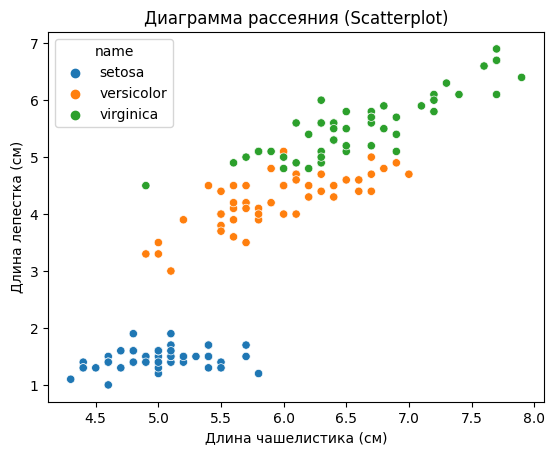

In [22]:
import seaborn as sns
from sklearn.datasets import load_iris

#загрузим набор данных ирисы
data = load_iris()

df = pd.DataFrame(data.data)

# зададим имена стоблцов такие же, как имена переменных
df.columns = data.feature_names
#добавим столбец с целевой переменной
#target - принадлежность ирисов тому или другому виду
df['target'] = data.target
#добавим столбец с сортами
df['name'] = df['target'].apply(lambda x : data.target_names[x])
#можем посмотреть какая получилась таблица
#df
ax = sns.scatterplot(data=df, x='sepal length (cm)', y='petal length (cm)', hue='name')
plt.xlabel('Длина чашелистика (см)')
plt.ylabel('Длина лепестка (см)')
plt.title('Диаграмма рассеяния (Scatterplot)')

plt.show()

## Задание 3

Попробуй решить задачу классификации подвидов ирисов с помощью деревьев решений.
Раздели датасет на обучающую и тестовую с параметрами `test_size=0.2`, `random_state=42`

Используя только признаки "Длина чашелистика" и "Длина лепестка", обучи дерево решений с глубиной дерева 2.
Посчитай точность (accuracy) классификации и округли её до 3 знаков после запятой.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn import tree, metrics

x= df.drop (['target', 'name', 'sepal width (cm)', 'petal width (cm)'], axis = 1)
y= df['target']

#разделим датасет на обучающую и тестовую с параметрами test_size=0.2, random_state=42
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#создаем классификатор с глубиной дерева 2
clf = tree.DecisionTreeClassifier(max_depth = 2)#DecisionTreeClassifier — это класс, способный выполнять мультиклассовую классификацию набора данных
clf.fit(x_train, y_train)#размещаем данные
y_pred = clf.predict(x_test)#строим прогнозные данные
y_pred

array([1, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [5]:
from sklearn.metrics import accuracy_score

#считаем точность (accuracy) классификации
accuracy = accuracy_score (y_test, y_pred).round(3)
print(f'Точность классификации = {accuracy}')

Точность классификации = 0.967


## Задание 4

Построй [разделяющую поверхность](code-samples/surface.py) по признакам "Длина чашелистика" и "Длина лепестка". 
Также отрисуй дерево, которое получилось в результате обучения модели. 
Напиши сколько листов у получившегося дерева.

In [6]:
import sys
#добавим путь к родительской папке в список путей поиска модулей
sys.path.append('../code-samples/')
from surface import *

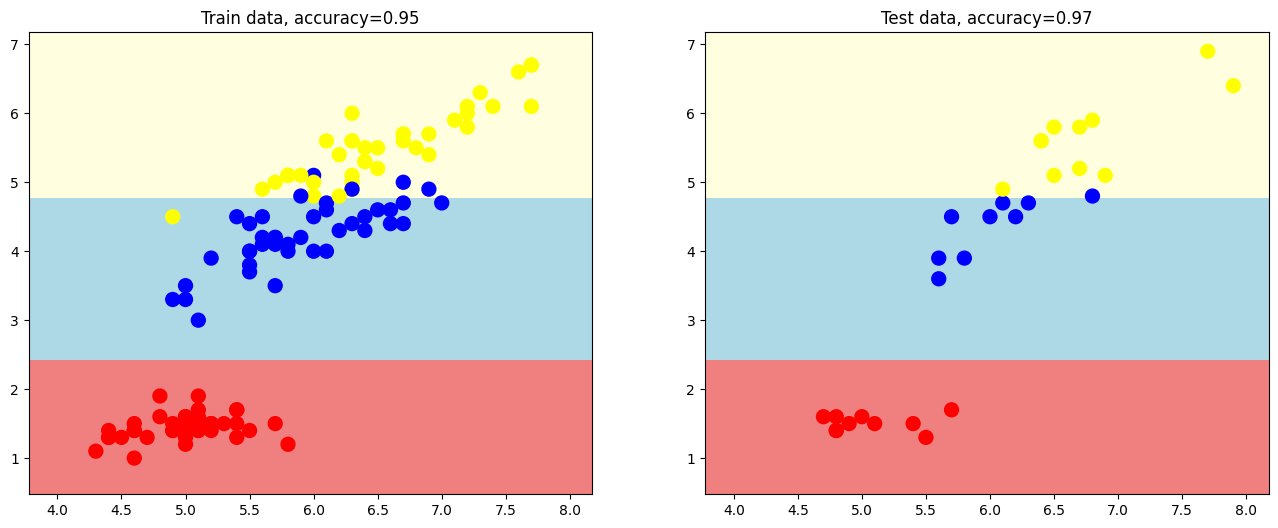

In [7]:
meshgrid = get_meshgrid(x.values)

#построим разделяющую поверхность и дерево решений
plot_decision_surface(clf, x_train, y_train, x_test, y_test)

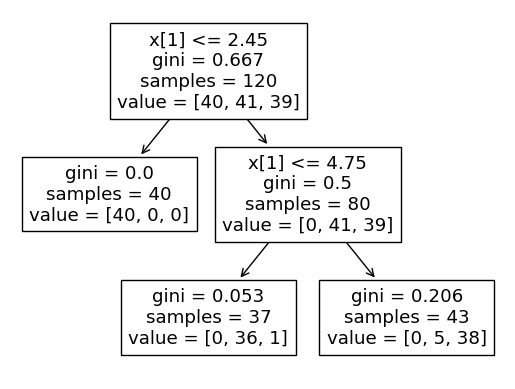

У получившегося дерева 3 листа.


In [8]:
#отрисуем дерево, которое получилось в результате обучения модели
tree.plot_tree(clf)
plt.show()#указываем для того, чтобы убрать "техническую" инфомацию
print(f'У получившегося дерева {clf.tree_.n_leaves} листа.')

## Задание 5

Теперь попробуем с помощью деревьев решений решить задачу регрессии.
Сгенерируй [синусоидальный сигнал](code-samples/dataset.py) с небольшими шумами размером 1000 отсчетов. 
Раздели датасет на обучающую и тестовую с параметрами `test_size=0.2`, `random_state=42`.
Обучи дерево решений для предсказания синусоидального сигнала c глубиной дерева 1. 
Построй график истинных ответов и предсказаний модели. Построив само дерево решений ты сможешь понять причины такого поведения модели.

Text(0, 0.5, 'Y')

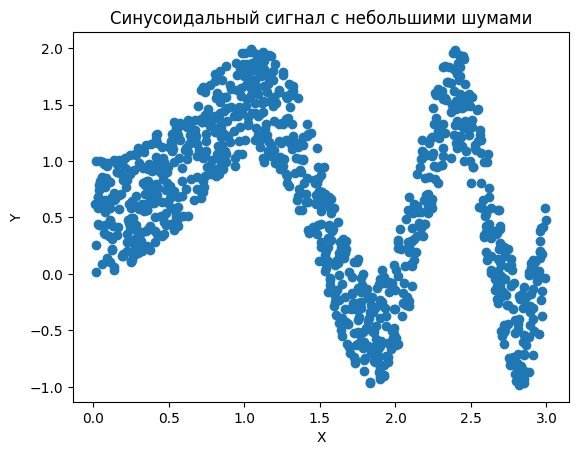

In [9]:
from dataset import generate_sin

#сгенерируем синусоидальный сигнал
x, y = generate_sin(1000, 1)
plt.scatter(x, y)
plt.title('Синусоидальный сигнал с небольшими шумами')
plt.xlabel("X")
plt.ylabel("Y")

Text(0, 0.5, 'Y')

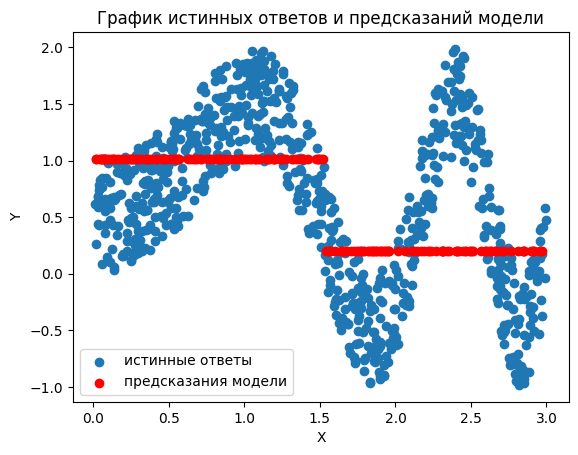

In [10]:
#делим на обучающую и тестовую часть
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
#создаем классификатор с глубиной дерева 1
clf = tree.DecisionTreeRegressor(max_depth = 1)
#размещаем данные и запускаем постройку модели
pred = clf.fit(x_train, np.ravel (y_train)) #np.ravel - помогает нам создавать многомерные массивы и получать другую математическую статистику

#выводим данные на графике
plt.scatter(x_train, np.ravel (y_train))
plt.scatter(x_test, clf.predict(x_test), color = 'red')
plt.legend(['истинные ответы', 'предсказания модели'])
plt.title("График истинных ответов и предсказаний модели")
plt.xlabel("X")
plt.ylabel("Y")
#не повторяет сигнал, потому что глубина дерева = 1 и имеет всего 2 значения: value = 1.01 и value = 0.204(см.отрисовку ниже)

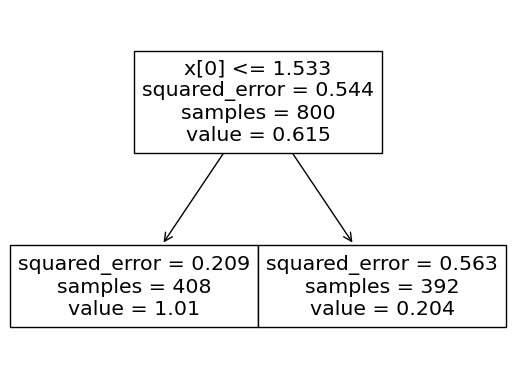

In [11]:
tree.plot_tree(clf)
plt.show()

## Задание 6

Попробуй менять грубину дерева в дереве решений для предсказания синуса.
Построй график зависимости среднеквадратичной ошибки (MSE) предсказания на тестовой выборке от глубины дерева
(от 1 до 30). Напиши глубину дерева, при которой качество модели наилучшее. 

[0.381, 0.257, 0.134, 0.114, 0.1, 0.102, 0.109, 0.119, 0.129, 0.139, 0.146, 0.148, 0.148, 0.151, 0.155, 0.159, 0.16, 0.16, 0.165, 0.163, 0.164, 0.164, 0.165, 0.165, 0.165, 0.165, 0.165, 0.165, 0.165, 0.165]


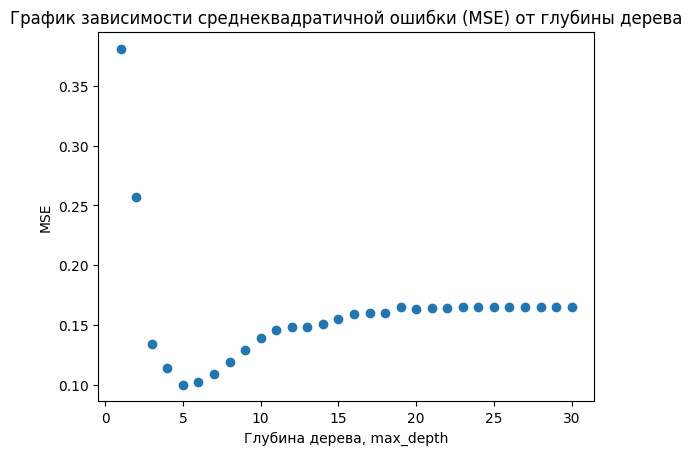

In [25]:
from sklearn.metrics import mean_squared_error

mse = []
min_mse = 0
min_mse_depth = 0
#задаем цикл
for i in range(1, 31):
    clf = tree.DecisionTreeRegressor(max_depth=i, random_state=42)#на каждой операции задаем глубину
    clf.fit(x_train, np.ravel (y_train))
    y_pred = clf.predict(x_test)
    mse.append(mean_squared_error(y_test, np.ravel (y_pred)).round(3))
               
plt. scatter (range(1,31), mse)
plt.title("График зависимости среднеквадратичной ошибки (MSE) от глубины дерева")               
plt.xlabel("Глубина дерева, max_depth")
plt.ylabel("MSE")
print(mse)
plt.show()

In [13]:
print ('Глубина дерева, на котором MSE на тестовой выборке наилучший:',
       mse.index(min(mse))+1)
#наименьшая ошибка при глубине дерева 5. Потом она возрастает (видим на графике) в связи с тем, что наша модель переобучается.

Глубина дерева, на котором MSE на тестовой выборке наилучший: 5


## Задание 7

Познакомься с методом bootstrap. Воспользуйся `BaggingRegressor` из `sklearn.ensemble` для того, чтобы обучить сразу 
несколько деревьев решений c параметром `max_depth=5`. \
Рассчитай среднеквадратичную ошибку (MSE) предсказания на тестовой выборке. Построй график зависимости MSE 
от **количества базовых моделей** в `BaggingRegressor` с параметрами `bootstrap=True, random_state=42` (от 1 до 50). 
Напиши количество деревьев, при котором качество модели наилучшее. 

Text(0, 0.5, 'Y')

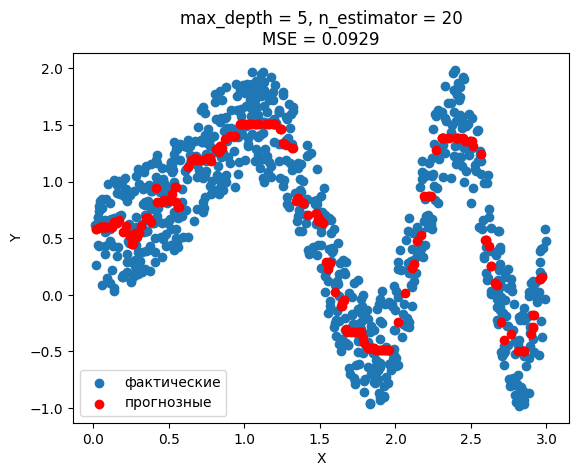

In [14]:
from sklearn.ensemble import BaggingRegressor

#создаем классификатор с глубиной дерева 5
tr = tree.DecisionTreeRegressor(max_depth = 5)
#передаем классификатор, каак параметр в BaggingRegressor
regr = BaggingRegressor(estimator = tr, random_state = 42,
                        bootstrap = True, bootstrap_features = True)
regr.fit(x_train, np.ravel (y_train))
pred = regr.predict(x_test)
#выводим данные на графике
plt.scatter(x_train, np.ravel (y_train))
plt.scatter(x_test, pred, color = 'red')
plt.legend(['фактические', 'прогнозные'])
plt.title('max_depth = 5, n_estimator = 20\nMSE = {}'.
         format(mean_squared_error(np.ravel(y_test), pred).round(4)))
plt.xlabel("X")
plt.ylabel("Y")

#видим, что при количестве деревьев = 20, ошибка стала меньше (MSE=0.0929),разброс стал меньше и стало больше "попаданий"

In [15]:
#делаем то же самое, только через цикл
from sklearn.metrics import accuracy_score
max_estimators = 50

mse = []
for i in range(1, max_estimators+1):
    regr = BaggingRegressor(estimator=tree.DecisionTreeRegressor(max_depth=5, random_state=42), 
                               n_estimators=i, bootstrap=True, random_state=42)
    regr.fit(x_train, np.ravel (y_train))
    pred = regr.predict(x_test)
    mse.append(mean_squared_error(np.ravel(y_test), pred))
print(mse) 

[0.10626315524395213, 0.10106044156646242, 0.09892083669101848, 0.09816531950551081, 0.09644171860371911, 0.09653412997263162, 0.09660838596215626, 0.09480822222540317, 0.09342985976124535, 0.09293587930231823, 0.0935584777429844, 0.0937333653506537, 0.09349770065806254, 0.09387214494171055, 0.09368394641585899, 0.0937483717165424, 0.09375572760441159, 0.09339233441820287, 0.09323274016247089, 0.09331682821042436, 0.09337660841578717, 0.09339329041313617, 0.09314077152237733, 0.09303695635237066, 0.09319703148213547, 0.09322278564767586, 0.09310799411398256, 0.09307958105687927, 0.09328606360940497, 0.09342220604353399, 0.0935835582137915, 0.09353169094143769, 0.0933961756909656, 0.09347852259055638, 0.09335716944485259, 0.0931901808201952, 0.09304877196617055, 0.09303302092357654, 0.09284515983332448, 0.0927894996832675, 0.09263026516623078, 0.09277557629474162, 0.09276138931907855, 0.09281671312737078, 0.09289184446373534, 0.09266438121196029, 0.09262002596469604, 0.09279921767081792

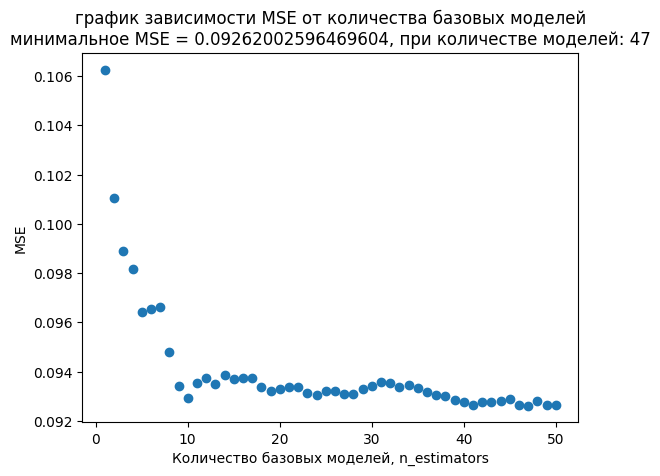

In [16]:
#выводим данные на графике
plt.scatter(range(1, max_estimators+1), mse)
plt.title('график зависимости MSE от количества базовых моделей\n' + 
          'минимальное MSE = {}, при количестве моделей: {}'. format(min(mse), mse.index(min(mse))+1))
plt.xlabel("Количество базовых моделей, n_estimators")
plt.ylabel("MSE")
plt.show()

In [17]:
print('Количество деревьев решений, при котором MSE на тестовой выборке наилучший:', mse.index(min(mse))+1)

Количество деревьев решений, при котором MSE на тестовой выборке наилучший: 47


## Задание 8

Познакомься с алгоритмом случайного леса (Random Forest). Обучи алгоритм случайного леса с параметрами `max_depth=5, 
n_estimators=100, max_features=1, random_state=42`.
Посчитай MSE на тестовой выборке и округли её до 3 знаков после запятой.

In [18]:
from sklearn.ensemble import RandomForestRegressor

#используем алгоритм случайного леса
regr = RandomForestRegressor(max_depth=5, n_estimators=100, max_features=1, random_state=42)
regr.fit(x_train, np.ravel (y_train))
pred = regr.predict(x_test)
mse = sklearn.metrics.mean_squared_error(y_test, pred).round(3)
print('MSE на тестовой выборке =', mse)

MSE на тестовой выборке = 0.091
